# Data Preprocessing for Spaceship Titanic Dataset

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Loading Data

In [2]:
# Load the training data
train_data_path = 'train.csv'
train_data = pd.read_csv(train_data_path)

# Display basic info and first few rows of the training data
train_data_info = train_data.info()
train_data_head = train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


(None,
   PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
 0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
 1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
 2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
 3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
 4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   
 
    RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
 0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
 1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
 2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
 3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
 4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   
 
    Transported  
 0        False  
 1         True  
 2        False  
 3        F

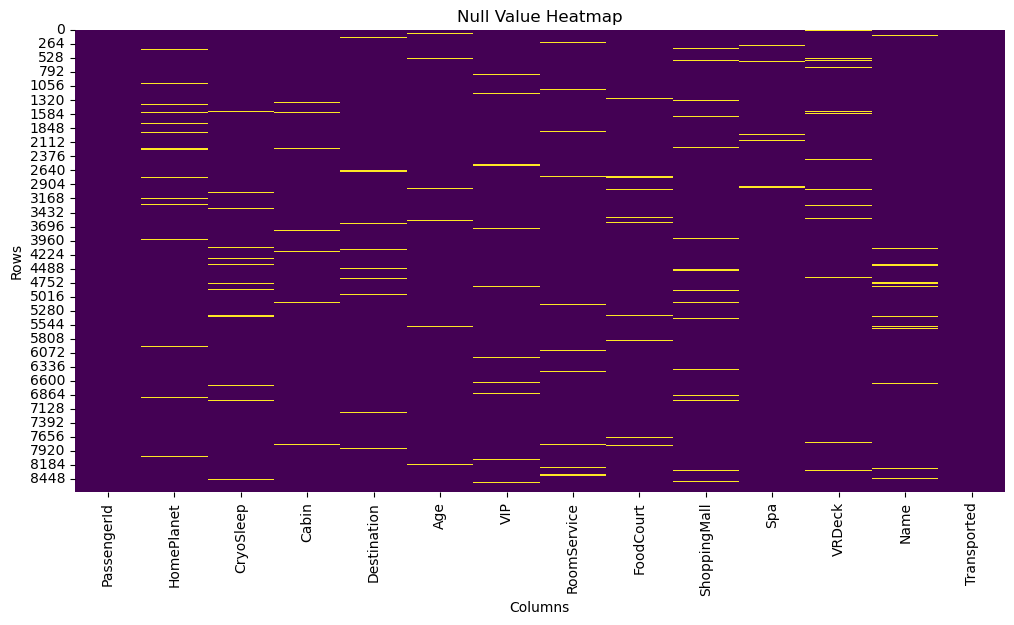

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Plotting null values
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Return basic info and first few rows as well for user reference
(train_data_info, train_data_head)


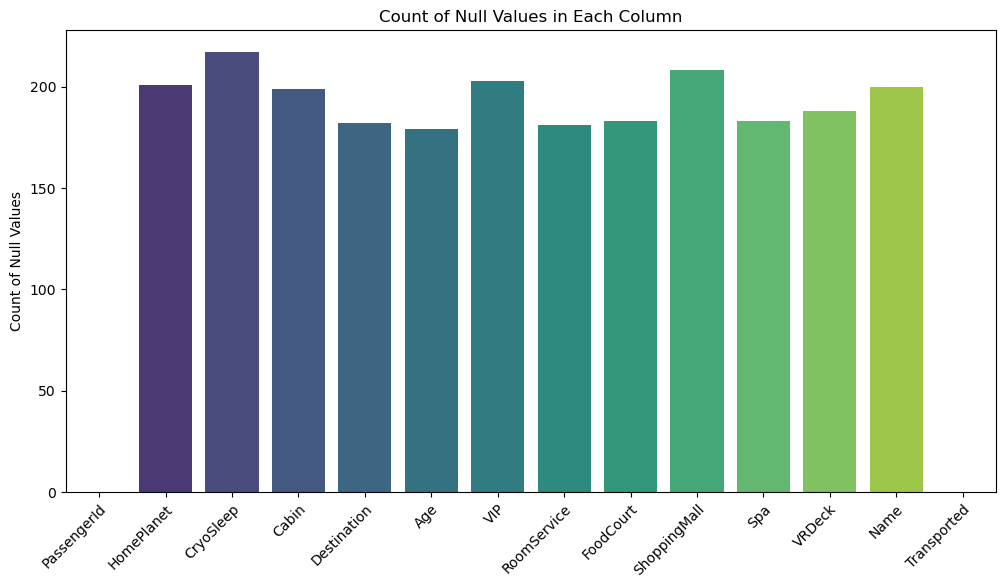

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
# Counting the null values in each column
null_counts = train_data.isnull().sum()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.ylabel("Count of Null Values")
plt.title("Count of Null Values in Each Column")
plt.show()

# Returning the exact numbers for reference
null_counts


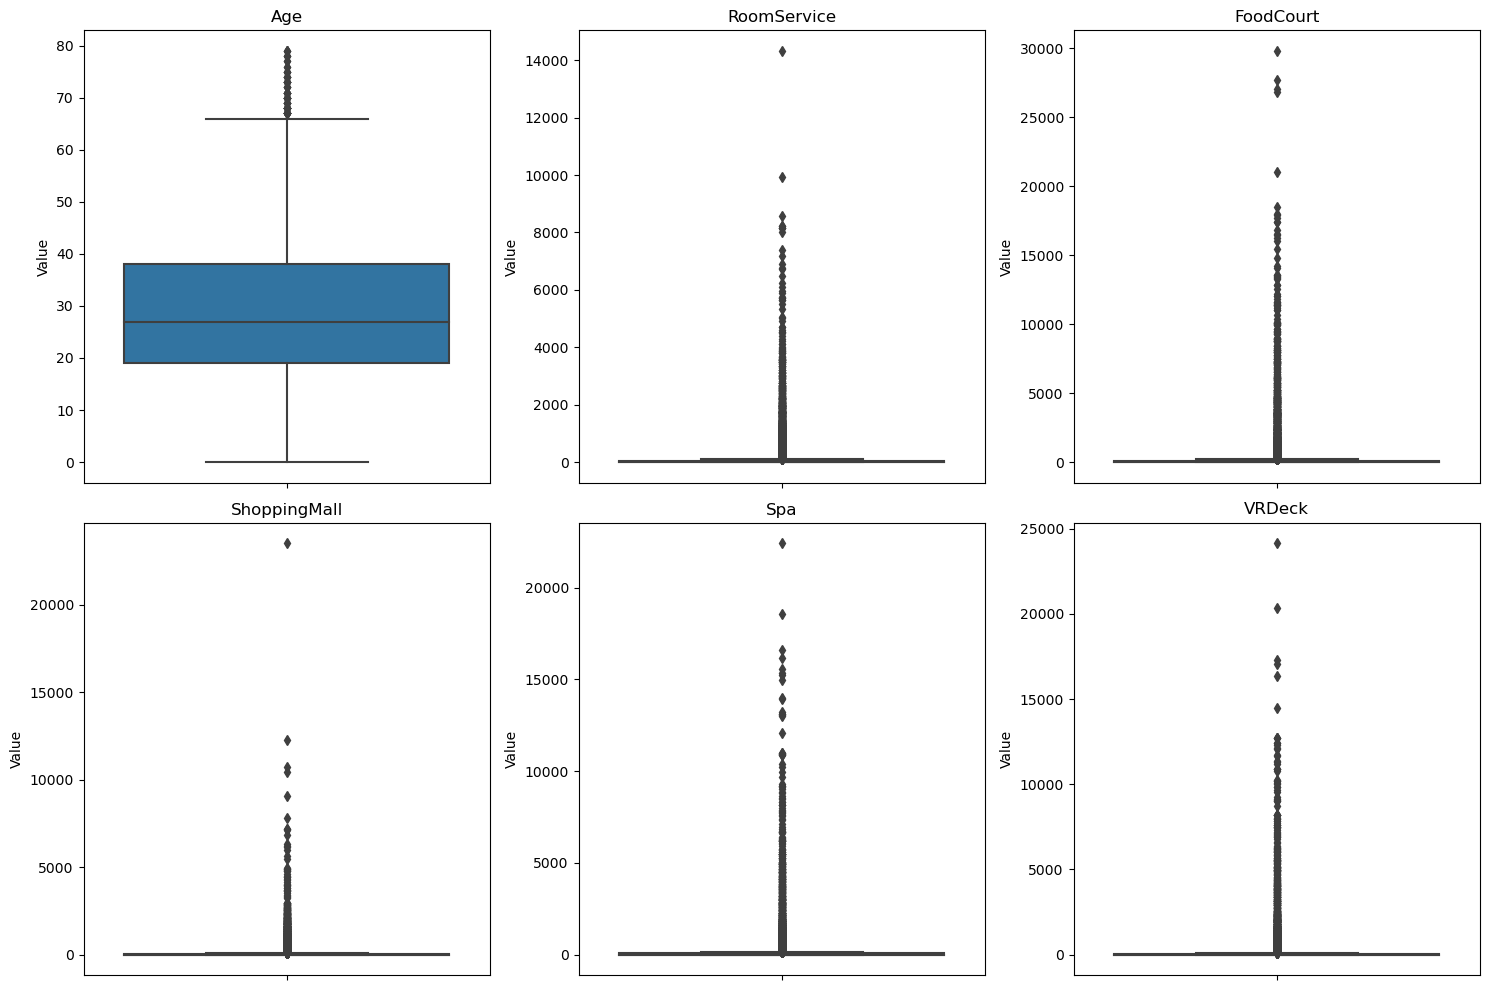

In [5]:
# Extracting numerical columns
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train_data[col])
    plt.title(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


## Handling Missing Values

In [6]:
# Filling missing values for categorical variables with 'Missing'
categorical_vars = ['CryoSleep', 'VIP', 'HomePlanet', 'Cabin', 'Destination', 'Name']
train_data[categorical_vars] = train_data[categorical_vars].fillna('Missing')

# Filling missing values for numerical variables with their respective medians
numerical_vars = ['ShoppingMall', 'VRDeck', 'FoodCourt', 'Spa', 'RoomService', 'Age']
train_data[numerical_vars] = train_data[numerical_vars].fillna(train_data[numerical_vars].median())

## Feature Engineering: Extracting Titles

In [7]:
# Defining a list of common titles
common_titles = ['Mr', 'Mrs', 'Miss', 'Ms', 'Dr', 'Prof', 'Rev', 'Sir', 'Lady', 'Mme', 'Mlle', 'Master']

# Extracting titles from 'Name' feature using the common titles list
train_data['Title'] = train_data['Name'].apply(lambda name: [title for title in common_titles if title in name])

# Replacing empty lists with 'Unknown' and extracting title from list
train_data['Title'] = train_data['Title'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')

## Categorical Variable Encoding and Data Normalization

In [8]:
# Converting boolean columns to string type
train_data[['CryoSleep', 'VIP']] = train_data[['CryoSleep', 'VIP']].astype(str)

# Columns to one-hot encode
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Title']

# Numerical columns to scale
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Defining transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Applying the transformations to the data
train_data_transformed = pd.DataFrame(preprocessor.fit_transform(train_data).toarray())

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

# Extracting the target variable and features from the original data
y = train_data['Transported'].astype(int)  # Converting boolean to integer
X_transformed = train_data_transformed  # Using the transformed features from previous steps

# Splitting the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Initializing a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Training the model
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)
confusion_mat = confusion_matrix(y_val, y_val_pred)

(train_accuracy, val_accuracy), classification_rep, confusion_mat


((0.8060109289617486, 0.7987349051178838),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.76      0.79       863\n           1       0.78      0.84      0.81       876\n\n    accuracy                           0.80      1739\n   macro avg       0.80      0.80      0.80      1739\nweighted avg       0.80      0.80      0.80      1739\n',
 array([[655, 208],
        [142, 734]], dtype=int64))

In [10]:
import pandas as pd

# Provided classification metrics extracted from the model output
metrics = ["precision", "recall", "f1-score", "support"]
class_0_metrics = [0.82, 0.76, 0.79, 863]
class_1_metrics = [0.78, 0.84, 0.81, 876]
macro_avg_metrics = [0.80, 0.80, 0.80, 1739]
weighted_avg_metrics = [0.80, 0.80, 0.80, 1739]

# Combining metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Metric': metrics,
    'Class 0': class_0_metrics,
    'Class 1': class_1_metrics,
    'Macro Average': macro_avg_metrics,
    'Weighted Average': weighted_avg_metrics
})

# Displaying the metrics DataFrame
print(metrics_df)


      Metric  Class 0  Class 1  Macro Average  Weighted Average
0  precision     0.82     0.78            0.8               0.8
1     recall     0.76     0.84            0.8               0.8
2   f1-score     0.79     0.81            0.8               0.8
3    support   863.00   876.00         1739.0            1739.0


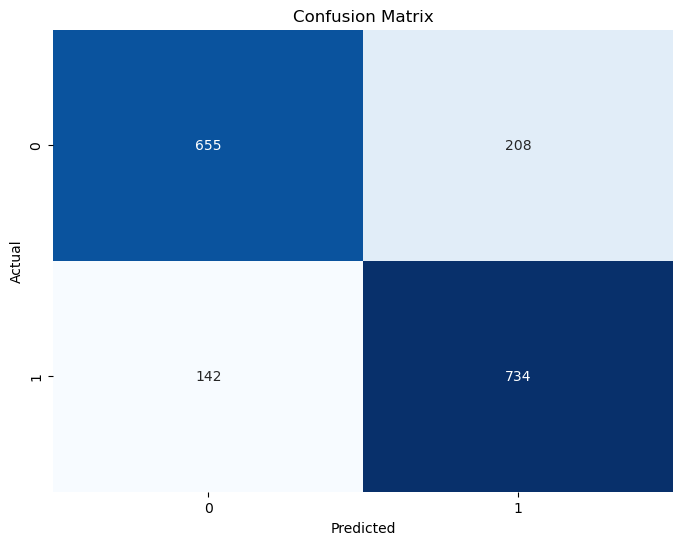

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Provided confusion matrix extracted from the model output
confusion_mat = [[655, 208], [142, 734]]

# Visualizing the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Defining the parameter grid
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': np.arange(3, 10)
}

# Setting up the Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # number of parameter settings that are sampled
    cv=3,  # number of cross-validation folds
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # use all available CPUs
)

# Fitting the model (this might take a while)
random_search.fit(X_train, y_train)

# Extracting the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_

best_params, best_score


({'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1},
 0.7986770204199022)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

# Extracting the target variable and features from the original data
y = train_data['Transported'].astype(int)  # Converting boolean to integer
X_transformed = train_data_transformed  # Using the transformed features from previous steps

# Splitting the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Initializing a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,random_state=42)

# Training the model
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)
confusion_mat = confusion_matrix(y_val, y_val_pred)

(train_accuracy, val_accuracy), classification_rep, confusion_mat



((0.821110152430256, 0.8056354226566993),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.77      0.80       863\n           1       0.79      0.84      0.81       876\n\n    accuracy                           0.81      1739\n   macro avg       0.81      0.81      0.81      1739\nweighted avg       0.81      0.81      0.81      1739\n',
 array([[666, 197],
        [141, 735]], dtype=int64))

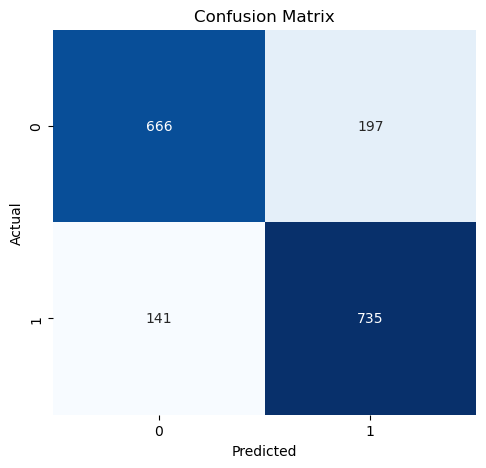

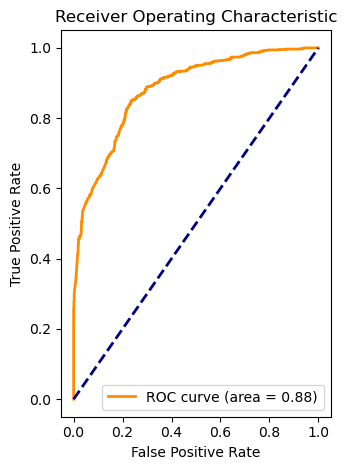

((0.821110152430256, 0.8056354226566993),
               precision    recall  f1-score      support
 0              0.825279  0.771727  0.797605   863.000000
 1              0.788627  0.839041  0.813053   876.000000
 accuracy       0.805635  0.805635  0.805635     0.805635
 macro avg      0.806953  0.805384  0.805329  1739.000000
 weighted avg   0.806816  0.805635  0.805387  1739.000000)

In [14]:
#Reun the model to create anaylsis graphs
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Initializing a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Training the model
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred, output_dict=True)
confusion_mat = confusion_matrix(y_val, y_val_pred)

# ROC Curve
y_val_proba = gb_model.predict_proba(X_val)[:, 1]  # Positive class probabilities
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Creating a DataFrame for classification report to easily visualize it and export if needed
classification_rep_df = pd.DataFrame(classification_rep).transpose()

# Plotting
plt.figure(figsize=(12, 5))

# Confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Return results
((train_accuracy, val_accuracy), classification_rep_df)


In [15]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(steps=[
                           ('model', RandomForestClassifier(random_state=42))
                          ])

# Fitting and evaluating the Random Forest model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

# Calculating performance metrics for the Random Forest model
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_classification_report = classification_report(y_val, rf_predictions, output_dict=True)
rf_confusion_matrix = confusion_matrix(y_val, rf_predictions)

(rf_accuracy, rf_classification_report, rf_confusion_matrix)


(0.7872340425531915,
 {'0': {'precision': 0.7699890470974808,
   'recall': 0.8146002317497103,
   'f1-score': 0.7916666666666667,
   'support': 863.0},
  '1': {'precision': 0.8062953995157385,
   'recall': 0.7602739726027398,
   'f1-score': 0.782608695652174,
   'support': 876.0},
  'accuracy': 0.7872340425531915,
  'macro avg': {'precision': 0.7881422233066097,
   'recall': 0.787437102176225,
   'f1-score': 0.7871376811594204,
   'support': 1739.0},
  'weighted avg': {'precision': 0.7882779284766607,
   'recall': 0.7872340425531915,
   'f1-score': 0.7871038244535007,
   'support': 1739.0}},
 array([[703, 160],
        [210, 666]], dtype=int64))

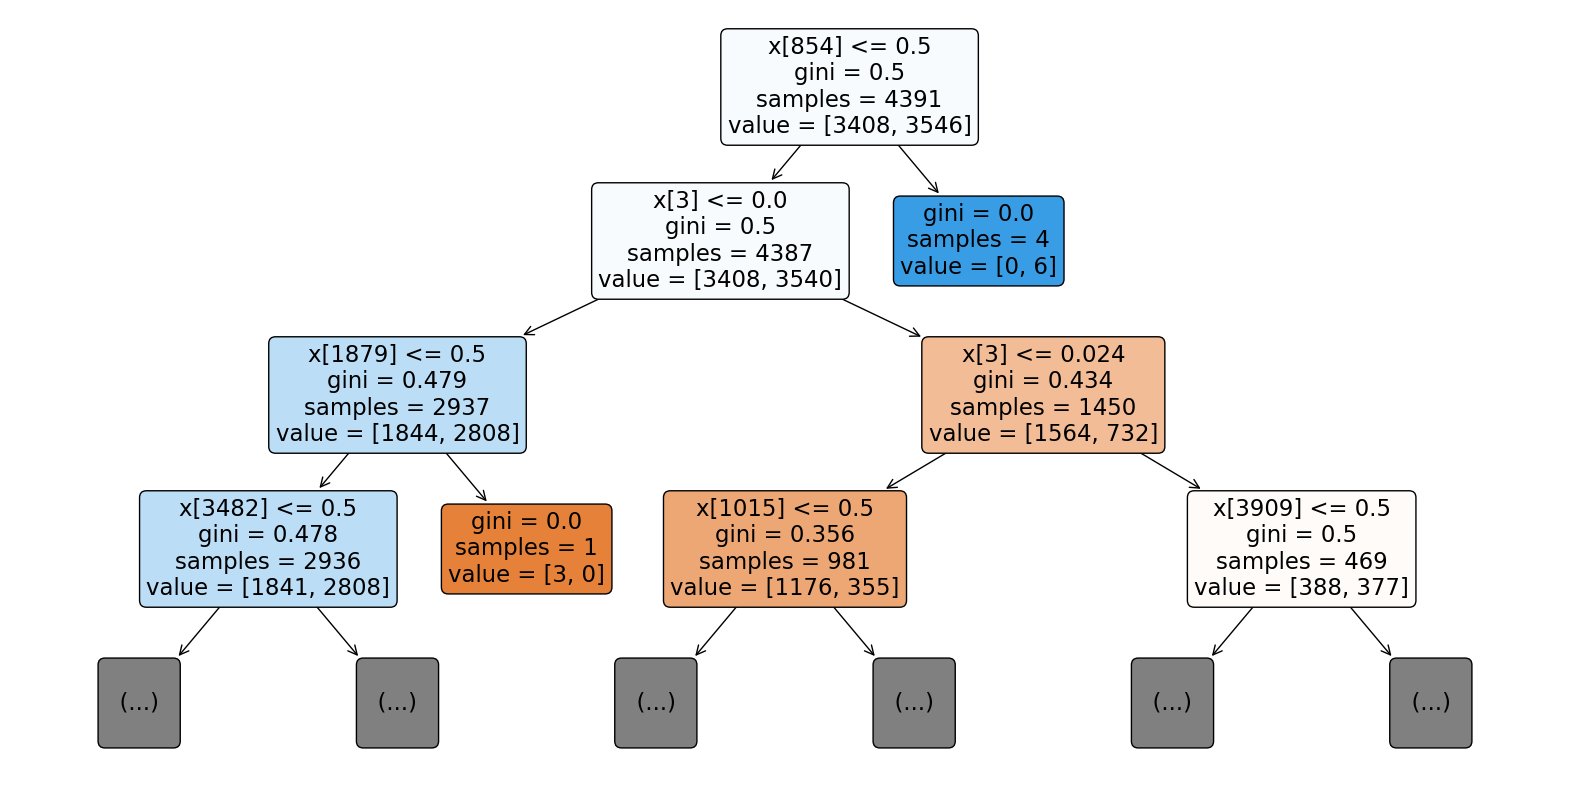

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract the RandomForest model from the pipeline
random_forest_from_pipeline = rf_model.named_steps['model']

# Choose one tree from the forest (e.g., the first tree)
chosen_tree = random_forest_from_pipeline.estimators_[0]

# Visualize the chosen tree
plt.figure(figsize=(20, 10))
plot_tree(chosen_tree, filled=True, rounded=True, max_depth=3)
plt.show()


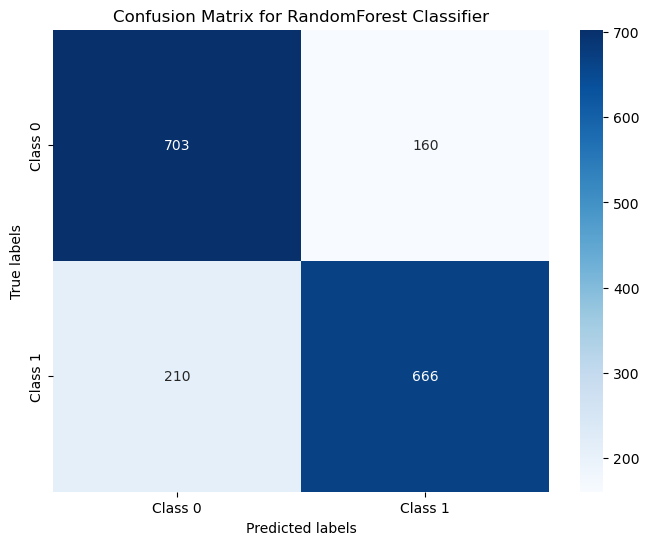

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the labels for the confusion matrix
# Assuming a binary classification, adjust as needed
labels = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.show()


In [20]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,6574,6575,6576,6577,6578,6579,6580,6581,6582,6583
3600,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1262,0.215190,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
8612,0.443038,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5075,0.329114,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4758,0.164557,0.0,0.0,0.002554,0.000045,0.213276,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
